In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper_fun import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Import train/test dats from pickle file

In [3]:
import pickle

# Load the training and testing split from the pickle file
with open('../data/train_test_data.pickle', 'rb') as file:
    train_test_split = pickle.load(file)


X_train_raw = train_test_split['X_train_raw']
y_train_raw = train_test_split['y_train_raw']
X_test_raw = train_test_split['X_test_raw']
y_test_raw = train_test_split['y_test_raw']


Load the different splits

In [4]:
with open('../data/train_splits.pickle', 'rb') as file:
    split_data = pickle.load(file)

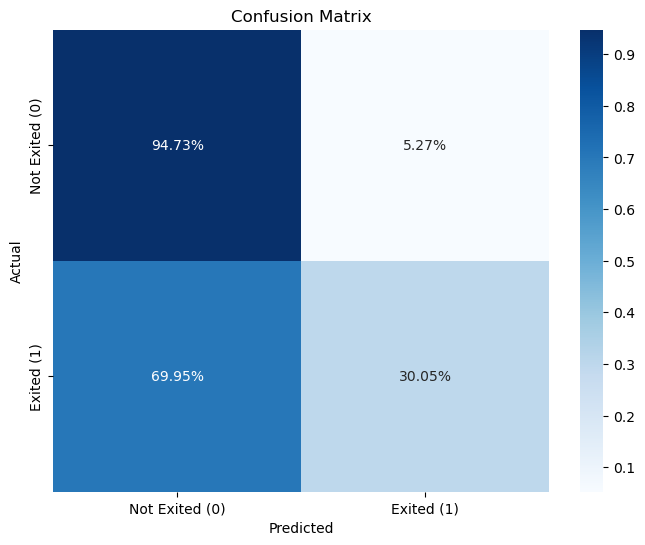

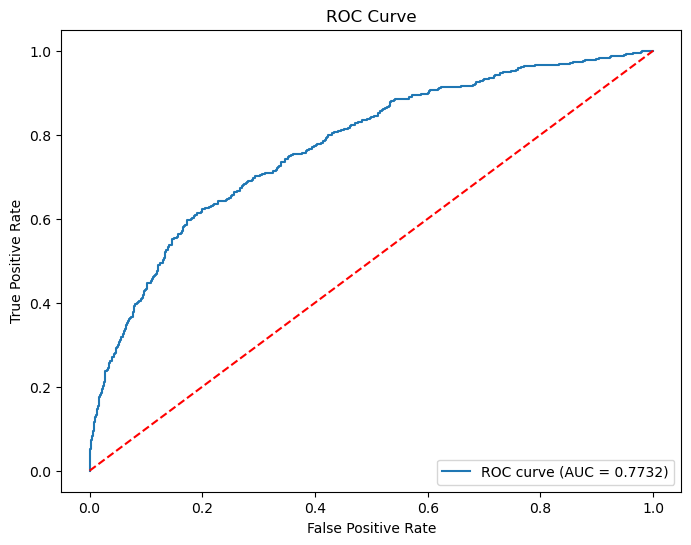

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

import matplotlib.pyplot as plt

performance = {}

# Create a logistic regressor with random state 42
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train_raw, y_train_raw)

# Predict on the test set
y_test_pred = log_reg.predict(X_test_raw)
y_test_pred_prob = log_reg.predict_proba(X_test_raw)[:, 1]

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_raw, y_test_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Not Exited (0)', 'Exited (1)'],
            yticklabels=['Not Exited (0)', 'Exited (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test_raw, y_test_pred_prob)
roc_auc = roc_auc_score(y_test_raw, y_test_pred_prob)

# Generate classification report
report = classification_report(y_test_raw, y_test_pred)
# Extract metrics from classification report
report_dict = classification_report(y_test_raw, y_test_pred, output_dict=True)
balanced_MCC = balanced_MCC_macro_avg(y_test_raw, y_test_pred)

performance = {
                'recall' : report_dict['1']['recall'],
                'f1-score' : report_dict['1']['f1-score'],
                'balalanced_MCC' : balanced_MCC
            }

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [6]:
# Convert the performance dictionary into a DataFrame
performance_df = pd.DataFrame(performance, index=['Raw split'])
performance_df

,recall,f1-score,balalanced_MCC
Raw split,0.300493,0.398693,0.324913
